In [1]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/drugs.csv'

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv(file_path)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [3]:
# Mengetahui jumlah dataset menggunakan shape
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 53766 baris, 7 kolom


In [4]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")


Jumlah baris duplikat: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [6]:
text = df[['review']]
text

,review
0,"""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc..."
...,...
53761,"""I have taken Tamoxifen for 5 years. Side effe..."
53762,"""I&#039;ve been taking Lexapro (escitaploprgra..."
53763,"""I&#039;m married, 34 years old and I have no ..."
53764,"""I was prescribed Nucynta for severe neck/shou..."


In [7]:
!pip install emoji
import emoji

import re

def cleanTweets(text):
    text = re.sub('@\w+', '', text)                                # Menghapus Username
    text = re.sub('https?:\/\/\S+', '', text)                       # Menghapus Link
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())      # Lower Case setiap kata
    text = re.sub('#','',text)                                      # Hanya menghapus simbol hastag
    text = re.sub('\d+', '', text)                                  # Menghapus angka
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text)  # Menghapus simbol-simbol beserta string selanjutnya
    text = re.sub('RT[\s]+','',text)                                # Menghapus kata yang memiliki "retweet / RT"
    text = re.sub('\n',' ',text)                                    # Menghapus newline
    text = emoji.replace_emoji(text, replace='')                    # Menghapus emoji atau emoticon
    return text

# Assuming df is your dataframe and 'Text Tweet' is the column to be cleaned
df.loc[:, 'review'] = df['review'].apply(cleanTweets)

df.head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 12.6 MB/s eta 0:00:00


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4
5,208087,Zyclara,Keratosis,days in on first weeks using on arms an...,4,3-Jul-14,13
6,215892,Copper,Birth Control,i ve had the copper coil for about mon...,6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,this has been great for me i ve been on...,9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,ive been on methadone for over ten years and ...,7,18-Oct-16,21
9,71428,Levora,Birth Control,i was on this pill for almost two years it d...,2,16-Apr-11,3


In [8]:
# Menentukan kategori risiko berdasarkan rating saja
def determine_risk(rating): # Changed 'row' to 'rating'
    if rating <= 3:
        return 'High Risk'
    elif 4 <= rating <= 7:
        return 'Moderate Risk'
    elif rating >= 8:
        return 'Low Risk'

# Menambahkan kolom baru 'category_risk' berdasarkan rating
df['category_risk'] = df['rating'].apply(determine_risk) # Applying to the 'rating' column

In [9]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,category_risk
0,163740,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22,Low Risk
1,206473,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17,Low Risk
2,159672,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,39293,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35,Low Risk
4,97768,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effe...,10,13-Sep-14,43,Low Risk
53762,140714,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgra...,9,8-Oct-16,11,Low Risk
53763,130945,Levonorgestrel,Birth Control,i m married years old and i have no ...,8,15-Nov-10,7,Low Risk
53764,47656,Tapentadol,Pain,i was prescribed nucynta for severe neck shou...,1,28-Nov-11,20,High Risk


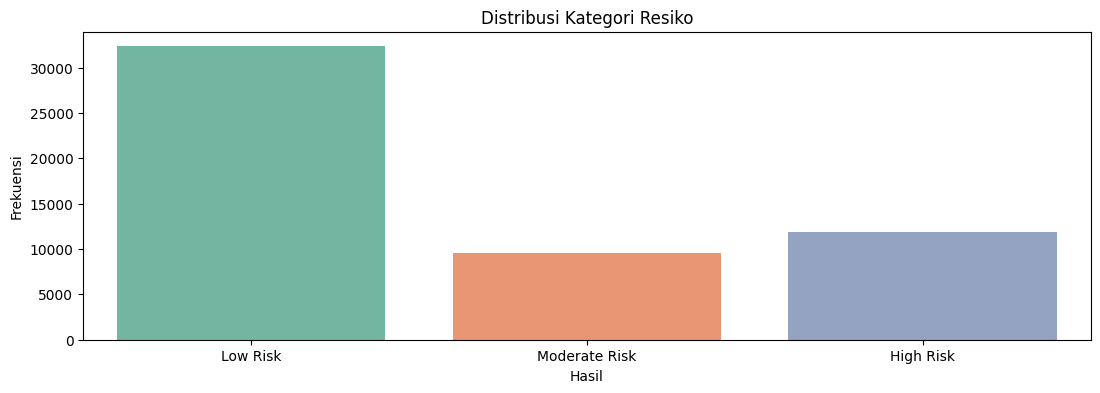

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label y dengan hue dan palette
plt.figure(figsize=(13,4))
sns.countplot(x='category_risk', data=df, hue='category_risk', palette='Set2', legend=False)
plt.title('Distribusi Kategori Resiko')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.show()


In [11]:
# prompt: hapus kolom uniqueid

df = df.drop('uniqueID', axis=1)
df

,drugName,condition,review,rating,date,usefulCount,category_risk
0,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22,Low Risk
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17,Low Risk
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35,Low Risk
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effe...,10,13-Sep-14,43,Low Risk
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgra...,9,8-Oct-16,11,Low Risk
53763,Levonorgestrel,Birth Control,i m married years old and i have no ...,8,15-Nov-10,7,Low Risk
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shou...,1,28-Nov-11,20,High Risk


In [12]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from nltk.corpus import stopwords

# Assuming 'df' is your DataFrame and 'Normalized Tweet' is the column containing your text
# Create a list of Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Function to remove stopwords from a text
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in indonesian_stopwords]
  return ' '.join(filtered_words)

# Apply the function to your DataFrame
df.loc[:, 'review'] = df['review'].apply(remove_stopwords)
df

,drugName,condition,review,rating,date,usefulCount,category_risk
0,Mirtazapine,Depression,i ve tried a few antidepressants over the year...,10,28-Feb-12,22,Low Risk
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done very w...,8,17-May-09,17,Low Risk
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,Contrave,Weight Loss,contrave combines drugs that were used for alc...,9,5-Mar-17,35,Low Risk
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cycl...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects ...,10,13-Sep-14,43,Low Risk
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgram since...,9,8-Oct-16,11,Low Risk
53763,Levonorgestrel,Birth Control,i m married years old and i have no kids takin...,8,15-Nov-10,7,Low Risk
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shoul...,1,28-Nov-11,20,High Risk


In [14]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['review'].apply(tokenize)
df['tokenize']

,tokenize
0,"[i, ve, tried, a, few, antidepressants, over, ..."
1,"[my, son, has, crohn, s, disease, and, has, do..."
2,"[quick, reduction, of, symptoms]"
3,"[contrave, combines, drugs, that, were, used, ..."
4,"[i, have, been, on, this, birth, control, for,..."
...,...
53761,"[i, have, taken, tamoxifen, for, years, side, ..."
53762,"[i, ve, been, taking, lexapro, escitaploprgram..."
53763,"[i, m, married, years, old, and, i, have, no, ..."
53764,"[i, was, prescribed, nucynta, for, severe, nec..."


In [15]:
# prompt: encoding category_risk

# Encoding the 'category_risk' column using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_risk'] = le.fit_transform(df['category_risk'])
df

,drugName,condition,review,rating,date,usefulCount,category_risk,tokenize
0,Mirtazapine,Depression,i ve tried a few antidepressants over the year...,10,28-Feb-12,22,1,"[i, ve, tried, a, few, antidepressants, over, ..."
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done very w...,8,17-May-09,17,1,"[my, son, has, crohn, s, disease, and, has, do..."
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,1,"[quick, reduction, of, symptoms]"
3,Contrave,Weight Loss,contrave combines drugs that were used for alc...,9,5-Mar-17,35,1,"[contrave, combines, drugs, that, were, used, ..."
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cycl...,9,22-Oct-15,4,1,"[i, have, been, on, this, birth, control, for,..."
...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects ...,10,13-Sep-14,43,1,"[i, have, taken, tamoxifen, for, years, side, ..."
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgram since...,9,8-Oct-16,11,1,"[i, ve, been, taking, lexapro, escitaploprgram..."
53763,Levonorgestrel,Birth Control,i m married years old and i have no kids takin...,8,15-Nov-10,7,1,"[i, m, married, years, old, and, i, have, no, ..."
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shoul...,1,28-Nov-11,20,0,"[i, was, prescribed, nucynta, for, severe, nec..."


In [16]:
# prompt: spliting for validation , train , test

from sklearn.model_selection import train_test_split

# Assuming 'tokenize' is your feature and 'category_risk' is your label
X = df['review'].values  # Assuming 'tokenize' is your feature column
y = df['category_risk'].values  # Assuming 'category_risk' is your label column

# Now you can use X and y in train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test

In [17]:
!pip install tensorflow

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Tentukan panjang maksimum sequence berdasarkan data training
max_length = max(len(seq) for seq in X_train_seq)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# One-hot encoding untuk label
y_train_cat = to_categorical(y_train, num_classes=4) # Assuming you have 4 classes for 'category_risk'
y_val_cat = to_categorical(y_val, num_classes=4) # Assuming you have 4 classes for 'category_risk'
y_test_cat = to_categorical(y_test, num_classes=4) # Assuming you have 4 classes for 'category_risk'


# Print untuk memastikan panjang maksimum sequence
print(f"Max length of sequences: {max_length}")
print(f"Training data shape: {X_train_pad.shape}, {y_train_cat.shape}")
print(f"Validation data shape: {X_val_pad.shape}, {y_val_cat.shape}")
print(f"Testing data shape: {X_test_pad.shape}, {y_test_cat.shape}")

Max length of sequences: 1187
Training data shape: (43012, 1187), (43012, 4)
Validation data shape: (5377, 1187), (5377, 4)
Testing data shape: (5377, 1187), (5377, 4)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    # Bidirectional LSTM untuk menangkap konteks dua arah
    Bidirectional(LSTM(16, kernel_regularizer='l2')),

    # Dropout untuk menghindari overfitting
    Dropout(0.4),

    # Layer Dense dengan aktivasi ReLU
    Dense(16, activation='relu', kernel_regularizer='l2'),

    # BatchNormalization (opsional)
    BatchNormalization(),

    # Dropout tambahan untuk regularisasi
    Dropout(0.3),

    # Output layer dengan softmax untuk klasifikasi multiclass
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
pip install scikit-learn

In [21]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight # Importing the function

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [22]:
# Compile dengan learning rate yang lebih kecil
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=5e-5)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Train the model
history = model.fit(
    X_train_pad,  # Use the padded sequences for training
    y_train_cat, # Use categorical data for labels
    validation_data=(X_val_pad, y_val_cat),
    class_weight=class_weights_dict, # Now class_weights_dict is defined in the same scope.
    batch_size=16,
    epochs=15,
    verbose=1
)

Epoch 1/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 199s 68ms/step - accuracy: 0.3041 - loss: 1.9503 - val_accuracy: 0.3909 - val_loss: 1.5054
Epoch 2/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 186s 67ms/step - accuracy: 0.4383 - loss: 1.4255 - val_accuracy: 0.5198 - val_loss: 1.1902
Epoch 3/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 202s 67ms/step - accuracy: 0.5573 - loss: 1.1353 - val_accuracy: 0.6394 - val_loss: 0.9573
Epoch 4/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 200s 66ms/step - accuracy: 0.6054 - loss: 1.0107 - val_accuracy: 0.6366 - val_loss: 0.9005
Epoch 5/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 201s 66ms/step - accuracy: 0.6238 - loss: 0.9425 - val_accuracy: 0.6037 - val_loss: 0.9162
Epoch 6/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 203s 66ms/step - accuracy: 0.6387 - loss: 0.8910 - val_accuracy: 0.6742 - val_loss: 0.8001
Epoch 7/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 177s 66ms/step - accuracy: 0.6485 - loss: 0.8651 - val_accuracy: 0.5325 - val_loss: 1.0607
Epoch 8/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 203s 66ms/step - accuracy: 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1187, 16)            │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 32)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,590 (1.89 MB)

 Trainable params: 164,852 (643.95 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 329,706 (1.26 MB)

In [26]:
# prompt: classification report

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test_cat, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1190
           1       0.87      0.67      0.75      3215
           2       0.28      0.49      0.36       972

    accuracy                           0.64      5377
   macro avg       0.60      0.61      0.59      5377
weighted avg       0.72      0.64      0.66      5377



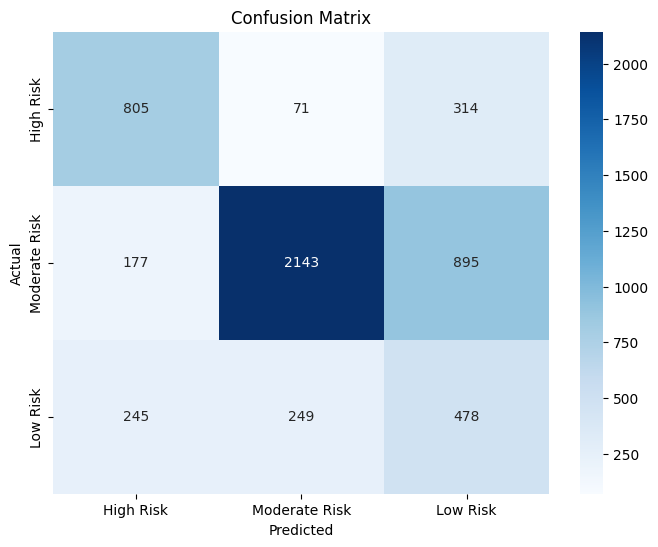

In [27]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are already defined from the previous code

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High Risk', 'Moderate Risk', 'Low Risk'],
            yticklabels=['High Risk', 'Moderate Risk', 'Low Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()